# 타이타닉 데이터 분석 (성별을 중심으로)

[1] 모듈 로딩 및 데이터 확인 <hr>

In [68]:
# [1-1] 모듈 로딩 
import pandas as pd                         # 데이터 분석 및 전처리 모듈
import matplotlib.pyplot as plt             # 데이터 시각화 모듈
import font                                 # 사용자 정의 모듈 - 폰트
import numpy as np                          # 배열 관련 모듈

In [69]:
# [1-2] 데이터 로딩 및 폰트 설정

# 데이터 불러오기
datas=r'../1월 24일/titanic.csv'
titanic=pd.read_csv(datas)

# 폰트 설정
font_path=r'C:/Users/knudc/AppData/Local/Microsoft/Windows/Fonts/강원교육모두 Bold.ttf'
font.set_font(font_path)

GangwonEduAll 폰트 설정


In [70]:
# [1-3] 데이터 확인 

# 데이터 기본 정보 확인
titanic.info()
# 필요한 데이터의 목록 :
# survived(생존 여부), pclass(탑승객 등급), sex(성별), who(남성,여성,어린이 여부), embarked_town(탑승 도시)
# embarked_town 에서 2개의 결측치 확인

# 결측치 수정 전 각 열의 고유값 확인 
titanic['survived'].unique() # 문제 없음
titanic['pclass'].unique() # 문제 없음
titanic['sex'].unique() # 문제 없음
titanic['who'].unique() # 문제 없음
titanic['embark_town'].unique() # nan값이 발견됨

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

[2] 데이터 전처리 <hr>

In [71]:
# [2-1] 결측치 처리
# embark_town 열에서 발견된 2개의 결측치를 임의로 채우기는 불가능하다는 판단
# 아쉽지만 2개 열 데이터는 반영치 않기로 결정함

# embark_town 열이 nan값인 행 삭제 
# subset으로 특정 열 지정
titanic.dropna(subset=['embark_town'],inplace=True)
titanic.info()

# [2-2] 필요한 데이터만 남기고 잘라내기
titanic.drop(['age','sibsp','parch','fare','embarked','adult_male','deck','alive','alone','class'],axis=1,inplace=True)
# 확인
titanic.head()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     889 non-null    int64  
 1   pclass       889 non-null    int64  
 2   sex          889 non-null    object 
 3   age          712 non-null    float64
 4   sibsp        889 non-null    int64  
 5   parch        889 non-null    int64  
 6   fare         889 non-null    float64
 7   embarked     889 non-null    object 
 8   class        889 non-null    object 
 9   who          889 non-null    object 
 10  adult_male   889 non-null    bool   
 11  deck         201 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        889 non-null    object 
 14  alone        889 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 99.0+ KB


survived  pclass     sex    who  embark_town
0         0       3    male    man  Southampton
1         1       1  female  woman    Cherbourg
2         1       3  female  woman  Southampton
3         1       1  female  woman  Southampton
4         0       3    male    man  Southampton

In [72]:
# [2-3] 잘라낸 데이터 확인

# 기본 정보 확인 
# 타입이 잘 맞춰져 있음을 확인
titanic.info()

# 고유값 확인
titanic['survived'].unique() # 문제 없음
titanic['pclass'].unique() # 문제 없음
titanic['sex'].unique() # 문제 없음
titanic['who'].unique() # 문제 없음
titanic['embark_town'].unique() # 문제 없음

# 혹시 모르니 결측치 재확인
titanic.isna().sum() # 문제 없음

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   survived     889 non-null    int64 
 1   pclass       889 non-null    int64 
 2   sex          889 non-null    object
 3   who          889 non-null    object
 4   embark_town  889 non-null    object
dtypes: int64(2), object(3)
memory usage: 41.7+ KB


survived       0
pclass         0
sex            0
who            0
embark_town    0
dtype: int64

In [73]:
# 컬럼별 통계치 확인
titanic.describe()

survived      pclass
count  889.000000  889.000000
mean     0.382452    2.311586
std      0.486260    0.834700
min      0.000000    1.000000
25%      0.000000    2.000000
50%      0.000000    3.000000
75%      1.000000    3.000000
max      1.000000    3.000000

[3] 데이터 분석 <hr>

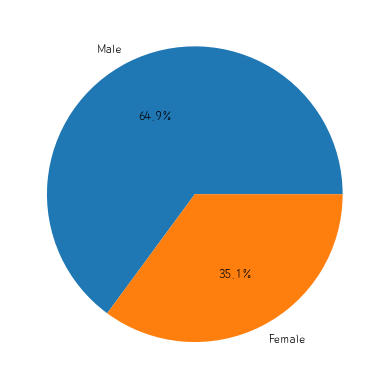

In [74]:
# 탑승객 성비 
data1=titanic['sex'].value_counts()

plt.pie(data1,labels=['Male','Female'], autopct='%1.1f%%')
plt.show()

# 확인 결과 남성 탑승객이 여성 탑승객에 비해 약 2배 정도 많았다. 

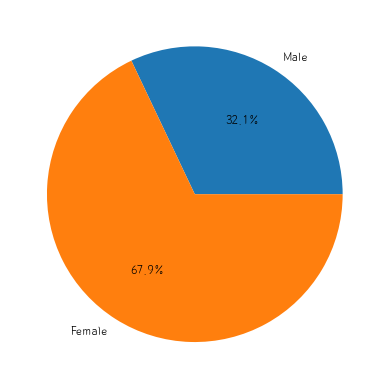

In [75]:
# 생존자 성비
data1=titanic[(titanic['sex']=='male') & (titanic['survived']==1)]
data2=titanic[(titanic['sex']=='female') & (titanic['survived']==1)]
data3=[data1.shape[0],data2.shape[0]]

plt.pie(data3,labels=['Male','Female'], autopct='%1.1f%%')
plt.show()

# 생존자 성비는 탑승객 성비와 정반대의 결과가 나왔다. 여성 생존자가 남성 생존자에 비해 약 2배 정도 많았다.